<a href="https://colab.research.google.com/github/shuvo1165/Machine-Learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("Version: ",tf.__version__)
print("Eanger Mode: ",tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.3.0
Eanger Mode:  True
GPU is NOT AVAILABLE


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Exploratory Data Analysis

In [5]:
type(fashion_mnist)

module

In [6]:
X_train.shape

(60000, 28, 28)

In [ ]:
len(y_train)

60000

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
len(y_test)

10000

Training Image Analysis

In [ ]:
print("Training Lebel:")
print(y_train[0])
print("Training Image:")
print(X_train[0])

Training Lebel:
9
Training Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0 

In [ ]:
np.max(X_train)

255

Data Preprocessing

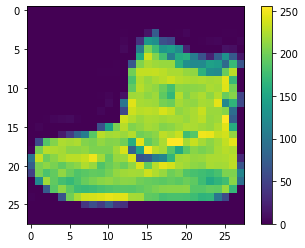

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

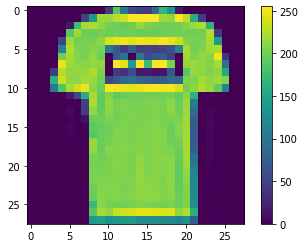

In [ ]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

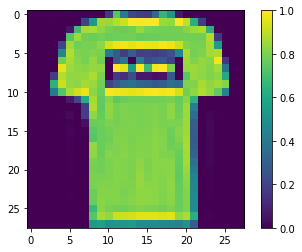

In [8]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

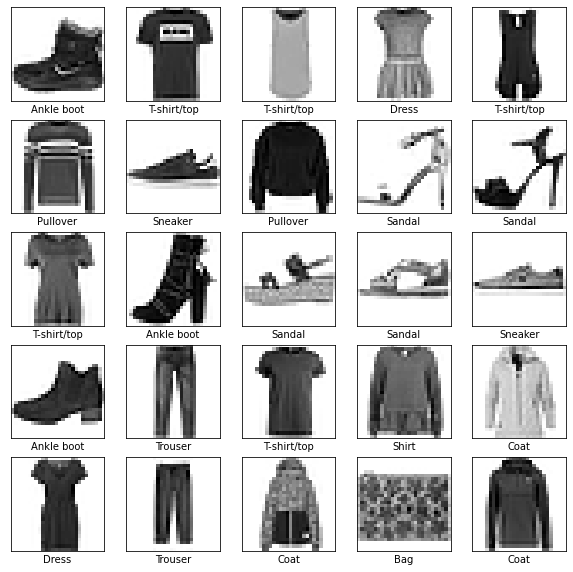

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

Model Building 

Setting Layer

In [9]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4994 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3784 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3382 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2817 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2687 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2495 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 959us/step - loss: 0.3361 - accuracy: 0.8807

Test accuracy: 0.8806999921798706


In [19]:
prediction = model.predict(X_test)

In [20]:
prediction[0]

array([1.2751361e-09, 8.9413632e-10, 1.0086484e-09, 7.1022122e-10,
       1.3316876e-09, 1.4689709e-03, 3.8043893e-07, 1.5956717e-02,
       5.9750924e-08, 9.8257381e-01], dtype=float32)

In [21]:
np.argmax(prediction[0])

9

In [22]:
y_test[0]

9

In [23]:
prediction[2334]

array([2.22635578e-07, 5.40567857e-09, 1.19088106e-02, 2.36046418e-08,
       9.86496747e-01, 6.74848510e-10, 1.59404986e-03, 6.30169040e-13,
       1.11953966e-07, 1.29787815e-12], dtype=float32)

In [24]:
np.argmax(prediction[2334])

4

In [25]:
y_test[2334]

4

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

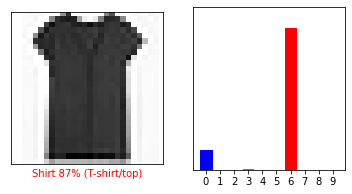

In [27]:
i=1305
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  y_test)
plt.show()

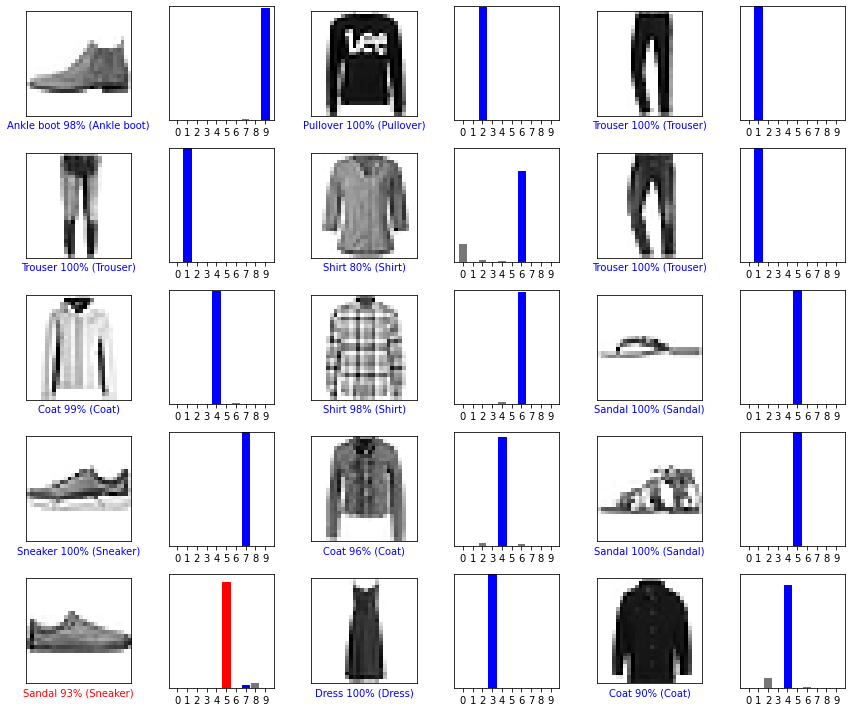

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], y_test)
plt.tight_layout()
plt.show()

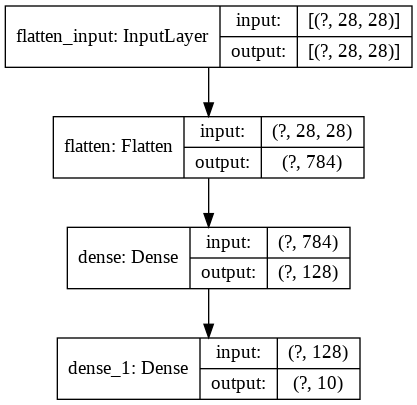

In [18]:
keras.utils.plot_model(model, "mnsit_model.png", show_shapes=True)